For today's exercise, finding some interesting data. Little bit of googling around took me to this page: https://www.dataquest.io/blog/free-datasets-for-projects/ and, mostly at random, decided to look into the World Bank (#12)

This one looked like an interesting first dataset: http://data.worldbank.org/data-catalog/world-development-indicators

The World Bank has a detailed API, and Oliver Sherouse has been kind enough to write a Python wrapper around it. http://wbdata.readthedocs.io/en/latest/. After `pip install wbdata` ...

In [128]:
import wbdata 

In [129]:
%matplotlib inline

In [130]:
wbdata.get_source() # List world bank data sources

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database
12	Education Statistics
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
21	Global Economic Monitor Commodities
55	Commodity Prices- History and Projections
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity Lab
19	Millennium Development Goals
24	Povert

In [133]:
# List all available indicators from that source. Very long list. Nicely scrolled in local notebook, but 
# overwhelming on github cache
# wbdata.get_indicator(source=2) 

In [134]:
# wbdata.get_data("EG.USE.PCAP.KG.OE") # Returns long list of dictionary objects
wbdata.get_indicator("EG.USE.PCAP.KG.OE")

EG.USE.PCAP.KG.OE	Energy use (kg of oil equivalent per capita)


In [135]:
energy_use = wbdata.get_dataframe({"EG.USE.PCAP.KG.OE": "Energy Use"})["Energy Use"]
# Now, what I've lost here is metadata that makes my units immediately interpretable
# But beautiful that you get index alignment

In [136]:
energy_use.head()

country     date
Arab World  2016            NaN
            2015            NaN
            2014    1953.286680
            2013    1796.943956
            2012    1840.176074
Name: Energy Use, dtype: float64

In [137]:
type(energy_use)

pandas.core.series.Series

In [138]:
energy_use.index.get_level_values(0).unique()

Index(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country', length=264)

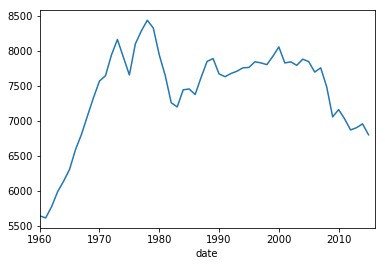

In [139]:
# Selecting from levels of multi-index
# energy_use.xs('2012', level="date")
energy_use["United States"].sort_index().plot()

Energy use is a Series with a multi-index. To use plotting, I want the countries as columns of a dataframe. `unstack` does that for me, and then the built-in plot will show selected items in a single plot. Interesting parameters of plot
* subplots: boolean. Show columns on individual charts rather than single
* sharey: when subplots=True, force y axes to align

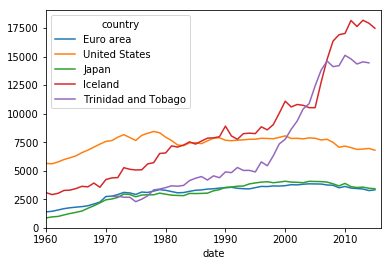

In [140]:
energy_use.unstack(0)[["Euro area", "United States", "Japan", "Iceland", "Trinidad and Tobago"]].plot()
#energy_use.unstack(0)[["Euro area", "United States", "Japan"]].plot(subplots=True, sharex=True, 
#                                                                    sharey=True, layout=(2,2), figsize=(12,6))


In [141]:
import warnings
warnings.filterwarnings('ignore')
top_users = energy_use.xs('2014', level="date").sort_values(ascending=False)

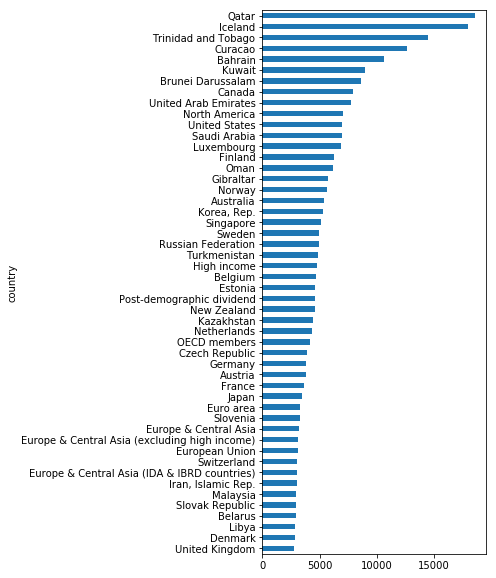

In [142]:
top_users[:50].sort_values(ascending=True).plot.barh(figsize=(4,10))

What's going on with Trinidad & Tobago? Obviously, small nation. In absolute terms this isn't going to be a big deal, but relative it pops to the top of the list. I'm not the only one who's asked. https://www.reddit.com/r/geography/comments/3kxv4u/why_does_trinidad_and_tobago_have_such_high/

From that thread:

 > Trinidad and Tobago is actually a surprisingly rich, industrialized nation. Their economy relies heavily on  petrochemicals and this eats up a lot of energy. If you go down to [page 14](http://www.energy.gov.tt/wp-content/uploads/2014/01/Framework-for-the-development-of-a-renewable-energy-policy-for-TT-January-2011.pdf) on this report on renewable energy by the government you can see a pie chart breaking down the electricity demand by sector. The industrial sector takes up about 61% of the nations energy.
 > 
 > *smectite*
 
Does the world bank give us the ability to break down energy consumption by sector? Interesting to look at residential, splitting out industry. See who's actually living environmentally.

Starting to look around for by sector sources
* https://catalog.data.gov/dataset/monthly-energy-consumption-by-sector
* http://ec.europa.eu/eurostat/statistics-explained/index.php/Consumption_of_energy
